In [104]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from pathlib import Path
import seaborn as sns

sns.set_theme()

In [105]:
from pathlib import Path




In [106]:
def makePlots(model, lr, graphType, log=False):
    temp = []
    graph = graphType

    #get directories of specifies files and search in the specified directory
    directory_in_str = os.getcwd() + '/ResultsData/' + graphType
    pathlist = Path(directory_in_str).glob('**/*.csv')

    for path in pathlist:
        path_in_str = str(path)
    
        if model and lr in path_in_str:
            print(path_in_str)
            temp.append(path_in_str)
    
    #plot graphs
    plt.figure(figsize=(10,10))
    for i in temp:
        _, fileName = os.path.split(i)
        #split filename
        ModelName, opt, lr, acc = fileName.split('-')
        
        letterList = list(graphType)
        firstWord = ''.join(letterList[0:5]).capitalize()
        secondWord = ''.join(letterList[5:len(letterList)]).capitalize()

        #remove the .csv from accuracy values
        temp = acc.split('.')
        acc = temp[0] + "." + temp[1]
    
        df = pd.read_csv(i, index_col=0)
        if log:
            plt.plot(np.log10(df), label=ModelName + ' ' + opt + ' ' + acc)
            plt.title(f"{model} log-{firstWord} {secondWord} graph, Learning Rate: {lr}")
        else:
            plt.plot(df, label=ModelName + ' ' + opt + ' ' + acc)
            plt.title(f"{model} {firstWord} {secondWord} graph, Learning Rate: {lr}")
        plt.xlabel('Epochs')
        if 'loss' in graphType:
            if log:
                plt.ylabel('Log-Loss')
            else:
                plt.ylabel("Loss")
        else:
            plt.ylabel("Accuracy")
        plt.legend()

    return 




# CNN plots


/Users/ahmadkida/Documents/SCHOOL/Fourth Year/Deep Learning/MaSS-optimiser/General/Code/ResultsData/trainloss/CNN-Nesterov-0.01-82.6.csv
/Users/ahmadkida/Documents/SCHOOL/Fourth Year/Deep Learning/MaSS-optimiser/General/Code/ResultsData/trainloss/CNN-SGD-0.01-78.68.csv
/Users/ahmadkida/Documents/SCHOOL/Fourth Year/Deep Learning/MaSS-optimiser/General/Code/ResultsData/trainloss/CNNBatchNorm-MaSS-0.01-82.73.csv
/Users/ahmadkida/Documents/SCHOOL/Fourth Year/Deep Learning/MaSS-optimiser/General/Code/ResultsData/trainloss/CNN-MaSS-0.01-81.6.csv
/Users/ahmadkida/Documents/SCHOOL/Fourth Year/Deep Learning/MaSS-optimiser/General/Code/ResultsData/trainloss/CNNBatchNorm-Nesterov-0.01-83.77.csv
/Users/ahmadkida/Documents/SCHOOL/Fourth Year/Deep Learning/MaSS-optimiser/General/Code/ResultsData/trainacc/CNN-Nesterov-0.01-82.6.csv
/Users/ahmadkida/Documents/SCHOOL/Fourth Year/Deep Learning/MaSS-optimiser/General/Code/ResultsData/trainacc/CNN-SGD-0.01-78.68.csv
/Users/ahmadkida/Documents/SCHOOL/Fourt

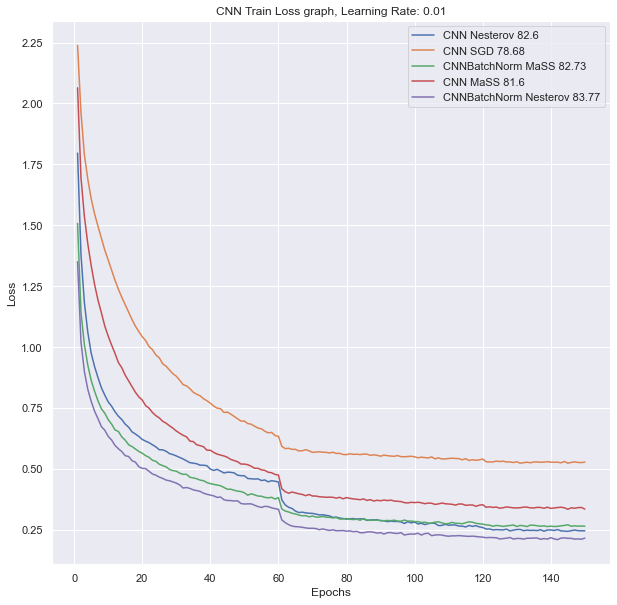

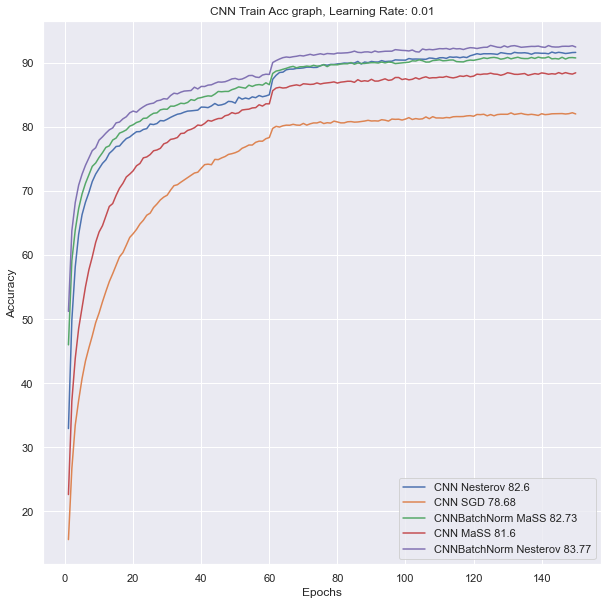

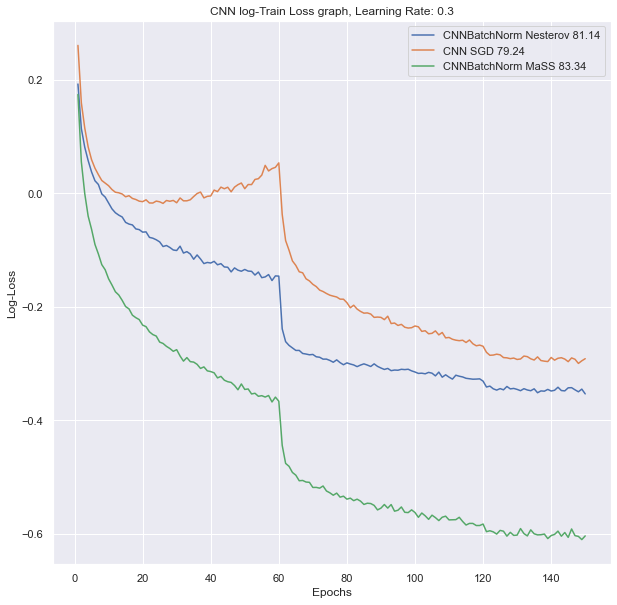

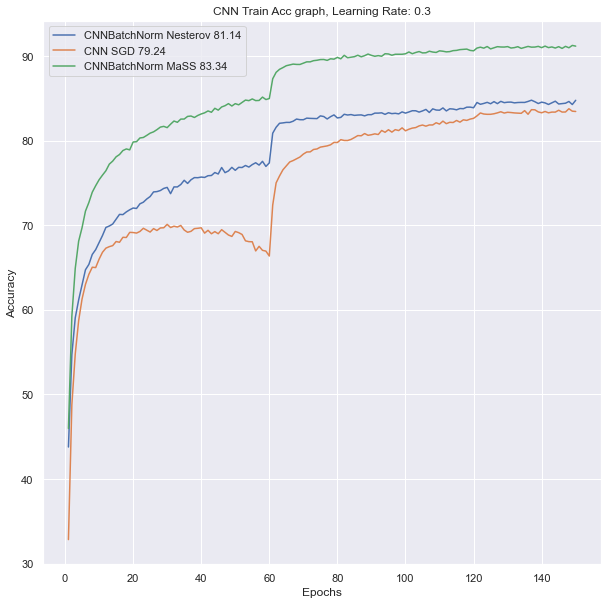

In [107]:
model = 'CNN'
lr = '0.01'
graphType = 'trainloss'

makePlots(model, lr, graphType)

model = 'CNN'
lr = '0.01'
graphType = 'trainacc'

makePlots(model, lr, graphType)

model = 'CNN'
lr = '0.3'
graphType = 'trainloss'

makePlots(model, lr, graphType, log=True)

model = 'CNN'
lr = '0.3'
graphType = 'trainacc'

makePlots(model, lr, graphType)


# ResNet plots

In [108]:
model = 'FCN'
lr = '00'
graphType = 'validacc'


# FCN plots


In [109]:
model = 'FCN'
lr = '00'
graphType = 'validacc'




